## Linear Regression Assumptions

Linear relationship between target and features

No outliers

No high-leverage points

Homoscedasticity of error terms

Uncorrelated error terms

Independent features

### 1 Linear Relationship Between Target & Features

In [1]:
import numpy as np
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]

In [2]:
x_reshape = x.reshape(-1,1)

In [3]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_reshape, y)

LinearRegression()

Text(0.5, 1.0, 'linear Relationship with Gaussian Noise')

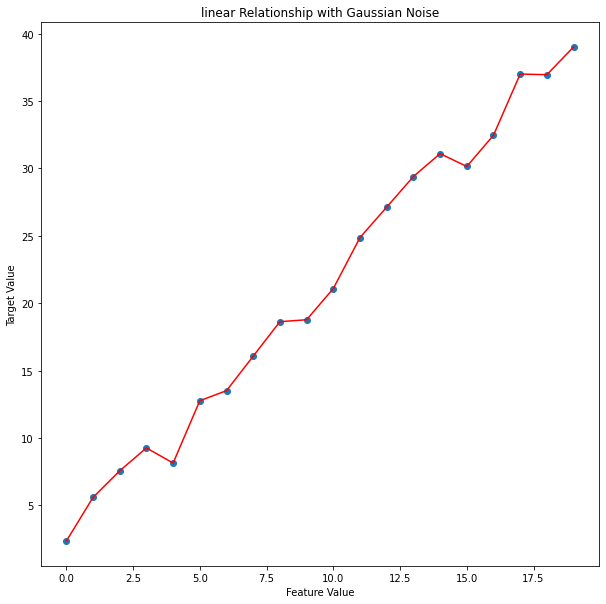

In [16]:
import seaborn as sns # To get graphs
import matplotlib.pyplot as plt # To get graphs
plt.figure(figsize=(10,10))
plt.scatter(x_reshape, y)
myline = np.linspace(0, 10, 100)
plt.plot(x_reshape, y, color ="r")
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('linear Relationship with Gaussian Noise')

In [4]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [5]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [6]:
s1 = Stats(x_reshape, y, linear)
pretty_print_stats(s1)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [7]:
y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(20)]
nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear)

LinearRegression()

### Potential Problem: Data w/Nonlinear Pattern

In [15]:
y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(20)]
nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear)

LinearRegression()

Text(0.5, 1.0, 'Nonlinear Relationship')

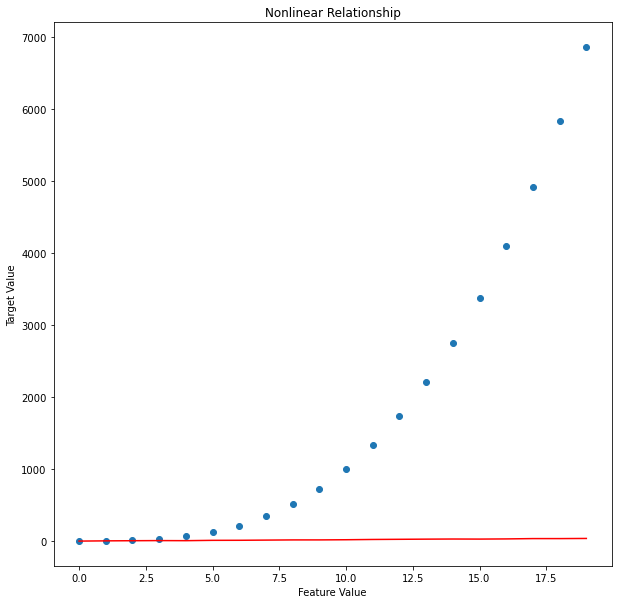

In [17]:
import seaborn as sns # To get graphs
import matplotlib.pyplot as plt # To get graphs
plt.figure(figsize=(10,10))
plt.scatter(x_reshape, y_nonlinear)
myline = np.linspace(0, 10, 100)
plt.plot(x_reshape, y, color ="r")
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Nonlinear Relationship')

In [35]:
s2 = Stats(x_reshape, y_nonlinear, nonlinear)
pretty_print_stats(s2)

sse:     14689543.7105
sst:     87330863.9008
r^2:     0.8318
adj_r^2: 0.8224


No surprise, we see a substantial increases in both SSE and SST as well as substantial ***decreases in R^2 and adjusted R^2.***

## Considerations

We can check to see if our model is capturing the underlying pattern effectively. Specifically, let’s generate side-by-side ***Residual Plots for the linear case and the nonlinear case.***

Text(0.5, 0, 'predicted values')

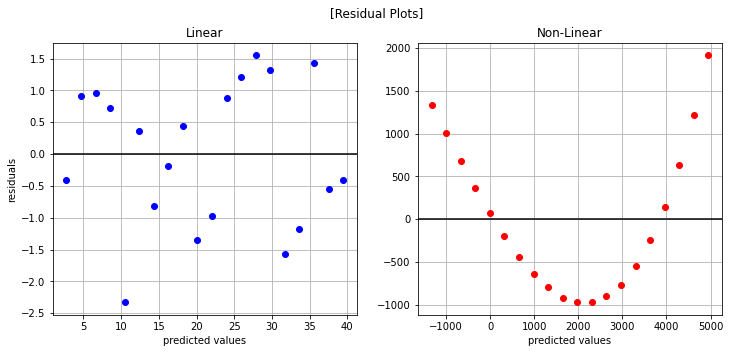

In [19]:
import matplotlib.pyplot as plt

#Linear Grid
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')

#Non-Linear Grid
axes[1].plot(nonlinear.predict(x_reshape), y_nonlinear-nonlinear.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Non-Linear')
axes[1].set_xlabel('predicted values')

**The nonlinear pattern** is overwhelmingly obvious in the residual plots. You may be wondering why we bothered plotting at all since we saw the nonlinear trend when plotting the observed data. That works well for low dimensional cases that are easy to visualize but how will you know if you have more than 2-3 features? The residual plot is a powerful tool in that case and something you should leverage often.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear')

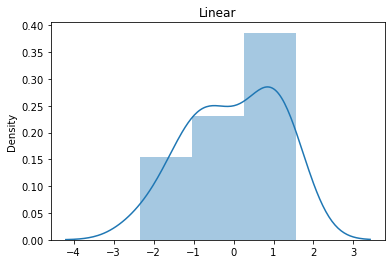

In [20]:
import seaborn as sns

residuals_linear = y - linear.predict(x_reshape)
residuals_nlinear = y_nonlinear - nonlinear.predict(x_reshape)

sns.distplot(residuals_linear);
plt.title('Linear')

The histogram of the linear model on linear data looks **approximately Normal (aka Gaussian)** while the second histogram shows a skew. But is there a more quantitative method to test for Normality? Absolutely. SciPy has a normaltest method. Let’s see it in action.

In [21]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=array([1.71234546]), pvalue=array([0.42478474]))

**The null hypothesis** is that the residual distribution is Normally distributed. Since the p-value > 0.05, we cannot reject the null. In other words, we can confidently say the residuals are Normally distributed.

In [22]:
normaltest(residuals_nlinear)

NormaltestResult(statistic=array([2.20078598]), pvalue=array([0.33274029]))

## Takeaway

**The linear data** exhibits a fair amount of randomness centered around 0 in the residual plot indicating our model has captured nearly all the discernable pattern. On the other hand, the nonlinear data shows a clear nonlinear trend. In other words, using the nonlinear data as-is with our linear model will result in a poor model fit.

## Possible Solutions to Nonlinear Data

1)Consider transforming the features

2)Consider applying a different algorithm

Say we have a single feature x. Assuming we see a nonlinear pattern in the data, we can transform x such that linear regression can pickup the pattern. For example, perhaps there’s a quadratic relationship between x and y. We can model that simply by including x^2 in our data. The x^2 feature now gets its own parameter in the model. This process of modeling transformed features with polynomial terms is called **polynomial regression**. Let’s see it in action.

## Polynomial Regression

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly.fit(x_reshape, y_nonlinear)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

Text(0.5, 1.0, 'Nonlinear Relationship')

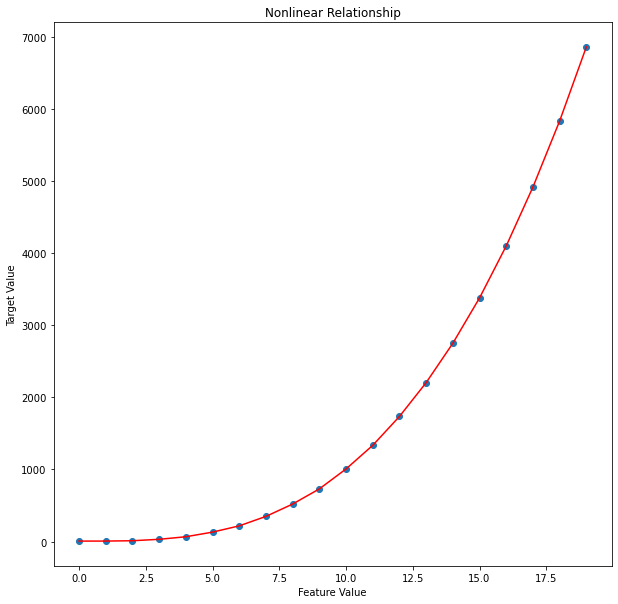

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x_reshape, y_nonlinear)
myline = np.linspace(0, 10, 100)
plt.plot(x_reshape, y_nonlinear, color ="r")
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Nonlinear Relationship')

### 2 No Outliers

In [27]:
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]
y_outlier = y.copy()
y_outlier[8] = np.array([38])  ## insert outlier

In [28]:
# sklearn expects 2D array so have to reshape x
x_reshape = x.reshape(-1,1)

# fit model w/standard data
linear_nooutlier = LinearRegression()
linear_nooutlier.fit(x_reshape, y);

# fit model w/outlier data
linear_outlier = LinearRegression()
linear_outlier.fit(x_reshape, y_outlier);

We’ll do the customary reshaping of our 1D x array and fit two models: one with the outlier and one without. Then we’ll investigate the impact on the various stats.

Text(0.5, 1.0, 'Linear Relationship Outlier')

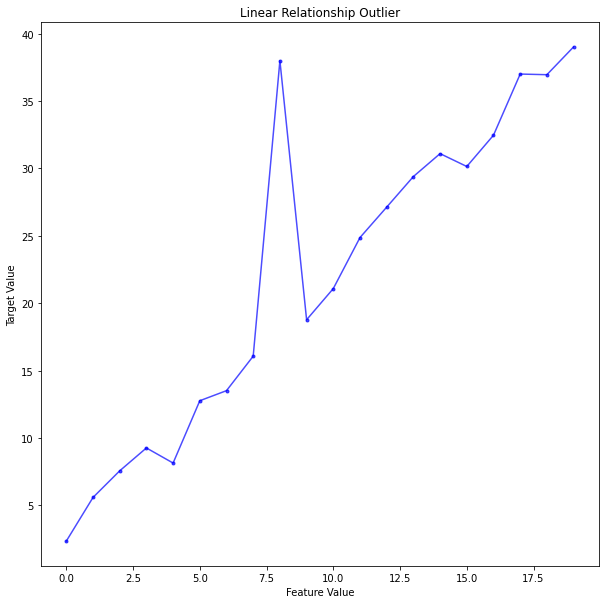

In [39]:
plt.figure(figsize=(10,10))
#plt.scatter(x_reshape, y_nonlinear)
myline = np.linspace(0, 10, 100)
plt.plot(x_reshape, y_outlier, color ="b",marker='.', alpha=0.7, linestyle='-')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Linear Relationship Outlier')



In [34]:
#With Outliers 
s3 = Stats(x_reshape, y_outlier, linear)
pretty_print_stats(s3)

sse:     416.3399
sst:     2764.0028
r^2:     0.8494
adj_r^2: 0.8410


In [32]:
#Without Outliers
pretty_print_stats(s1)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


### Possible Solutions
1)Investigate the outlier(s). Do NOT assume these cases are just bad data. Some outliers are true examples while others are data entry errors. You need to know which it is before proceeding.

2)Consider imputing or removing outliers.

## 3 No High-Leverage Points

### Generate Dummy Data

In [36]:
np.random.seed(20)
x = np.arange(20)
y_linear_leverage = [x*2 + np.random.rand(1)*4 for x in range(20)]
y_linear_leverage[18] = np.array([55])  ## high-leverage point
y_linear_leverage[19] = np.array([58])  ## high-leverage point

In [37]:
x_reshape = x.reshape(-1,1)

### Fitting into a Model

In [38]:
linear_leverage = LinearRegression()
linear_leverage.fit(x_reshape, y_linear_leverage)

LinearRegression()

Text(0.5, 1.0, 'Linear Relationship with High Leverage Points')

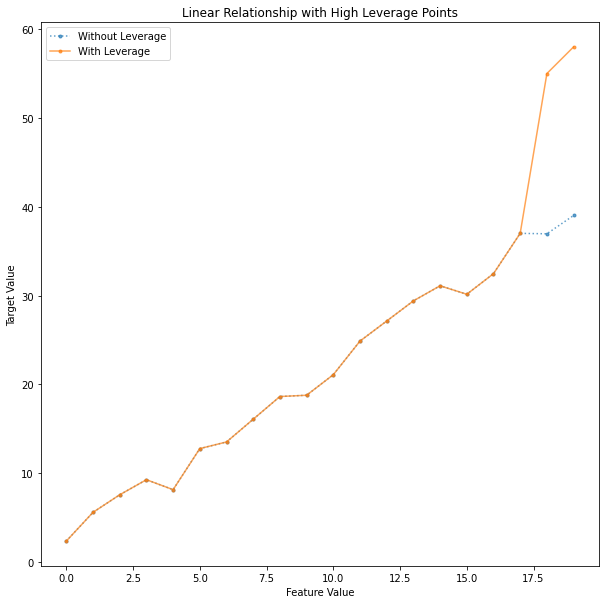

In [64]:
plt.figure(figsize=(10,10))
#plt.scatter(x_reshape, y_nonlinear)
myline = np.linspace(0, 10, 100)
plt.plot(x_reshape, y, label="Without Leverage",marker='.', alpha=0.7, linestyle='dotted')
plt.plot(x_reshape, y_linear_leverage, label="With Leverage" ,marker='.', alpha=0.7, linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Linear Relationship with High Leverage Points')

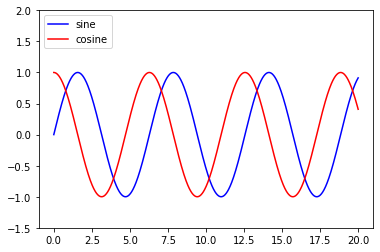

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, "-b", label="sine")
plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="upper left")
plt.ylim(-1.5, 2.0)
plt.show()

In [52]:
#Without No Leverage
pretty_print_stats(s1)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [53]:
#With the Leverage 
s4 = Stats(x_reshape, y_linear_leverage, linear)
pretty_print_stats(s4)

sse:     674.7325
sst:     4373.2096
r^2:     0.8457
adj_r^2: 0.8371


## Normalized Test

In [55]:
normaltest(y_outlier-linear_leverage.predict(x_reshape))

NormaltestResult(statistic=array([25.3995098]), pvalue=array([3.05187348e-06]))

Fails! The residuals are not **Normally distributed**, statistically speaking that is. This is a key assumption of linear regression and we have violated it.

## Possible Solutions
Explore the data to understand why these data points exist. Are they true data points or mistakes of some kind?

1)Consider imputing or removing them if outliers, but only if you have good reason to do so!

2)Consider a more robust loss function (e.g. Huber).

3)Consider a more robust algorithm (e.g. RANSAC).

Text(0.5, 0, 'predicted values')

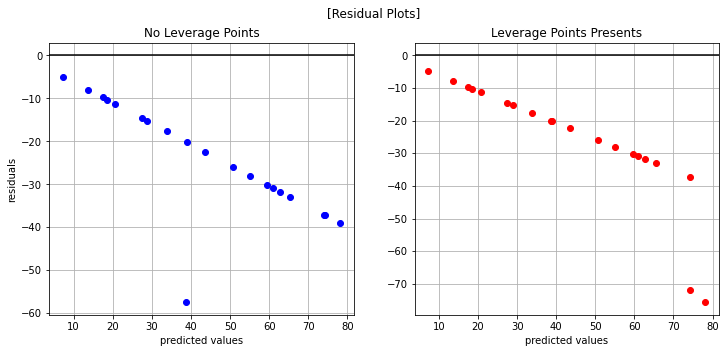

In [60]:
import matplotlib.pyplot as plt

#Linear Grid
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(y), y-linear.predict(y_outlier), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('No Leverage Points')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')

#Non-Linear Grid
axes[1].plot(linear.predict(y), y-linear.predict(y_linear_leverage), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Leverage Points Presents')
axes[1].set_xlabel('predicted values')

### 4 Homoscedasticity of Error Terms

**Homescedasticity** means the errors exhibit constant variance. 

This is a key assumption of linear regression. Heteroscedasticity, on the other hand, is what happens when errors show some sort of growth. The tell tale sign you have heteroscedasticity is a fan-like shape in your residual plot. Let’s take a look

In [61]:
#Generate Data
np.random.seed(20)
x = np.arange(20)
y_homo = [x*2 + np.random.rand(1) for x in range(20)]  ## homoscedastic error
y_hetero = [x*2 + np.random.rand(1)*2*x for x in range(20)]  ## heteroscedastic error

In [62]:
x_reshape = x.reshape(-1,1)

#### Fit Model

In [63]:
linear_homo = LinearRegression()
linear_homo.fit(x_reshape, y_homo)

linear_hetero = LinearRegression()
linear_hetero.fit(x_reshape, y_hetero)

LinearRegression()

Text(0.5, 1.0, 'Homescedasticity of Errors')

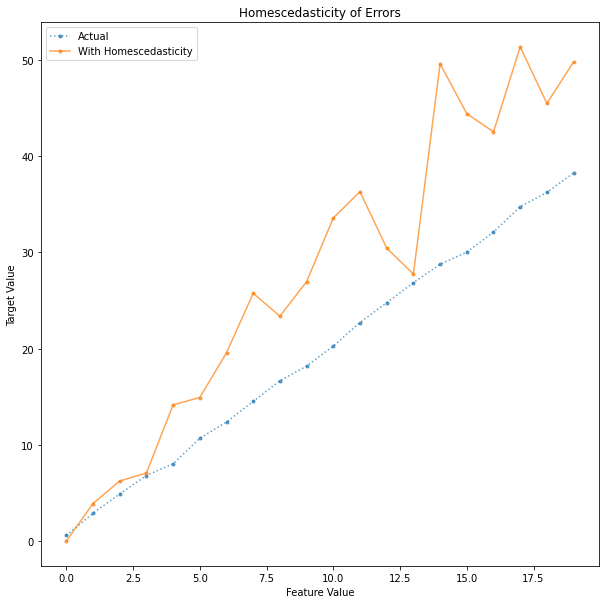

In [67]:
plt.figure(figsize=(10,10))
#plt.scatter(x_reshape, y_nonlinear)
myline = np.linspace(0, 10, 100)
plt.plot(x_reshape, y_homo, label="Actual",marker='.', alpha=0.7, linestyle='dotted')
plt.plot(x_reshape, y_hetero, label="With Homescedasticity" ,marker='.', alpha=0.7, linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Homescedasticity of Errors')

### Normal Test

In [68]:
# homoscedastic data
normaltest(y_homo-linear_homo.predict(x_reshape))

# heteroscedastic data
normaltest(y_hetero-linear_hetero.predict(x_reshape))

NormaltestResult(statistic=array([1.04126656]), pvalue=array([0.59414417]))

There’s no reason to ***reject the null that both residual distributions are Normally distributed.***

### Possible Solution
**Consider log transforming the target values**

In [69]:
y_hetero_log = np.log10(np.array(y_hetero) + 1e1)
x_reshape_log = np.log10(np.array(x_reshape) + 1e1)

linear_hetero_log = LinearRegression()
linear_hetero_log.fit(x_reshape, y_hetero_log)

linear_hetero_log_log = LinearRegression()
linear_hetero_log_log.fit(x_reshape_log, y_hetero_log)

LinearRegression()

Text(0.5, 0, 'predicted values')

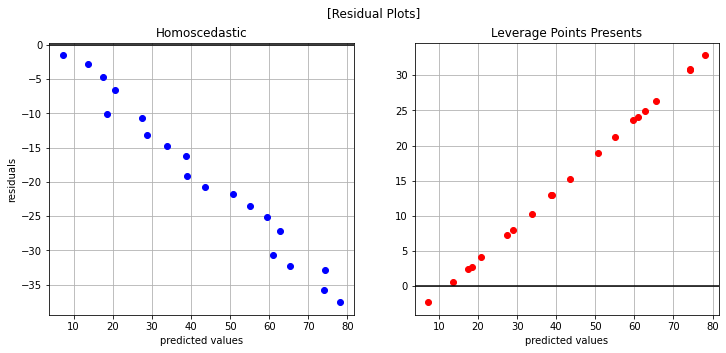

In [71]:
#Homoscedastic grid
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(y), y-linear.predict(y_homo), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Homoscedastic')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')

#Heteroscedastic
axes[1].plot(linear.predict(y), y-linear.predict(y_hetero_log), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Leverage Points Presents')
axes[1].set_xlabel('predicted values')

In [72]:
normaltest(y_hetero_log - linear_hetero_log.predict(x_reshape))

NormaltestResult(statistic=array([0.96954754]), pvalue=array([0.6158365]))

The plot on the right shows we addressed **heteroscedasticity** but there’a a fair amount of correlation amongst the errors. That brings us to our next assumption.

### 5 Uncorrelated Error Terms

In [73]:
#Generate Dummy Data
np.random.seed(20)
x = np.arange(20)
y_uncorr = [2*x + np.random.rand(1) for x in range(20)]
y_corr = np.sin(x)

In [74]:
x_reshape = x.reshape(-1,1)

In [77]:
linear_uncorr = LinearRegression()
linear_uncorr.fit(x_reshape, y_uncorr)

linear_corr = LinearRegression()
linear_corr.fit(x_reshape, y_corr)

LinearRegression()

### Residual Plot

Text(0.5, 0, 'predicted values')

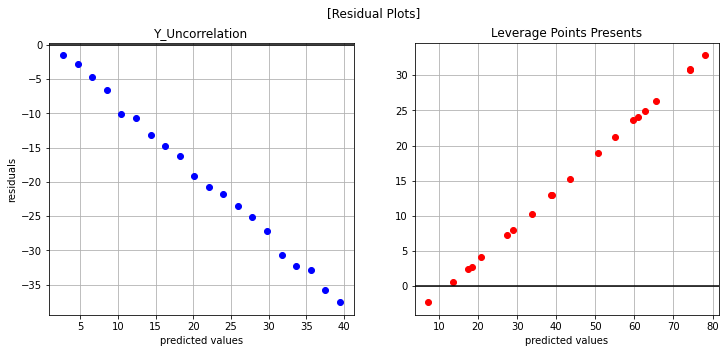

In [82]:
#Homoscedastic grid
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(x_reshape), y-linear.predict(y_uncorr), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Y_Uncorrelation')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')

axes[1].plot(linear.predict(y), y-linear.predict(y_hetero_log), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Leverage Points Presents')
axes[1].set_xlabel('predicted values')

## Possible Solution

1) Forget linear regression. Use time series modeling instead.

We’ll discuss time series modeling in detail in another post. For now, just know correlated errors is a problem for linear regression because linear regression expects records to be i.i.d.

### 6 Independent features

**Independent features** means no feature is an any way derived from the other features. For example, imagine a simple dataset with three features. The first two features are in no way related. However, the third is simply the sum of the first two features. That means this ficitonal dataset has one linearly dependent feature. That’s a problem for linear regression. Let’s take a look.

In [96]:
np.random.seed(39)
x1 = np.arange(20) * 2
x2 = np.random.randint(low=0, high=50, size=20)
x_idp = np.vstack((x1,x2))
ynew = np.add( np.sum(x_idp, axis=0), np.random.randn(20)*5 )  ## y = x1 + x2 + noise

### Example

C:\Users\Asus\AppData\Local\Temp/ipykernel_15768/2384096985.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


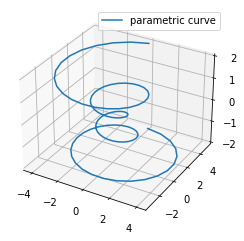

In [95]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y1 = r * np.cos(theta)
ax.plot(x, y1, z, label='parametric curve')
ax.legend()

plt.show()

In [97]:
ynew.shape

(20,)

C:\Users\Asus\AppData\Local\Temp/ipykernel_15768/1263555012.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


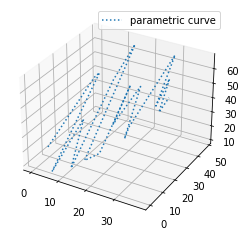

In [99]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x1, x2, ynew, label='parametric curve',linestyle='dotted')
ax.legend()

plt.show()

In [100]:
import pandas as pd
dp_df = pd.DataFrame([x1,x2,(x1+x2)]).T

## Fiiting Models

In [102]:
lr_idp = LinearRegression()
lr_idp.fit(x_idp.T, ynew)

lr_dp = LinearRegression()
lr_dp.fit(dp_df, ynew)

LinearRegression()

### linearly independent features
sse:     361.5308

sst:     6898.6751

r^2:     0.9476

adj_r^2: 0.9414

### linearly dependent features
1) sse:     361.5308

2) sst:     6898.6751

3) r^2:     0.9476

4) adj_r^2: 0.9378

**We see no difference in SSE, SST, or R^2**. 
As we learned in the previous post about metrics, adjusted R^2 is telling us that the additional feature in the linearly dependent feature set adds no new information, which is why we see a decrease in that value. Be careful because linear regression assumes independent features, and looking at simple metrics like SSE, SST, and R^2 alone won’t tip you off that your features are correlated.